In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## Task 1: Import the dataset

In [6]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

df = pd.read_csv(filepath)

df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [9]:
# Create headers list
headers = ['Age', 'Gender', 'BMI', 'No_of_Children', 'Smoker', 'Region', 'Charges']

# Assign headers to the dataframe
df.columns = headers

In [11]:
df.head(10)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


## Task 2: Data Cleaning

### i. Handle missing Data

In [40]:
# Replace '?' with NaN
df.replace('?', np.NaN, inplace = True)

In [52]:
# Evaluate for missing data
df.isnull().sum()

Age               0
Gender            0
BMI               0
No_of_Children    0
Smoker            0
Region            0
Charges           0
dtype: int64

In [36]:
# Calculate the mean for age
avg_age = df['Age'].astype('float').mean(axis=0)

# Replace missing age with the average age
df['Age'].replace(np.NaN, avg_age, inplace=True)

In [50]:
# Calculate the frequency for Smoker
smoker_freq = df['Smoker'].value_counts().idxmax()

# Replace missing value in 'Smoker' with the most frequent val
df['Smoker'].replace(np.NaN, smoker_freq, inplace=True)

### ii. Data type

In [54]:
# Update data types
df[['Age', 'Smoker']] = df[['Age', 'Smoker']].astype('int')

In [67]:
# Round the values in 'charges' to the nearest whole number
df[['Charges']] = np.round(df[['Charges']], 2)

df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


## Task 3: Exploratory Data Analysis

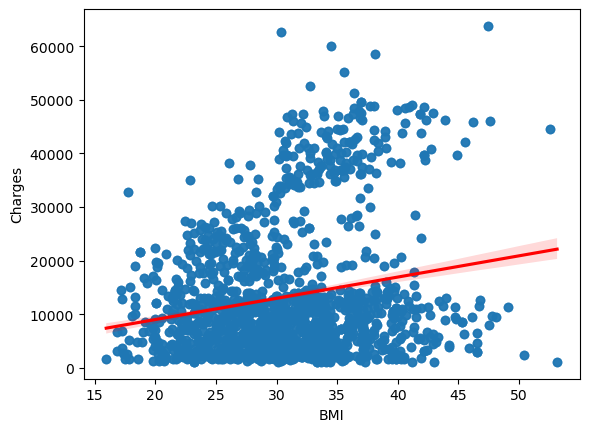

In [75]:
# Implement the regression plot for charges with respect to BMI
sns.regplot(x='BMI', y='Charges', data=df, line_kws={'color': 'red'})
plt.show()

In [77]:
# Examine the correlation between BMI and charges
df[['BMI', 'Charges']].corr()

,BMI,Charges
BMI,1.000000,0.199906
Charges,0.199906,1.000000


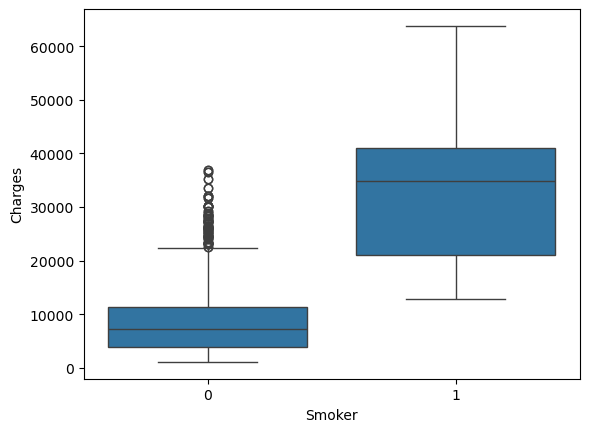

In [79]:
# Implement the box plot for charges with respect to smoker
sns.boxplot(x='Smoker', y='Charges', data=df)
plt.show()

In [83]:
# Examine the correlation between Smoker and charges
df[['Smoker', 'Charges']].corr()

,Smoker,Charges
Smoker,1.000000,0.789141
Charges,0.789141,1.000000


In [87]:
# Print the correlation matrix for the dataset
df.corr()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_Children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


## Task 4: Model Development

In [90]:
# Fit a LR model to predict the charges using Smoker as the predictor Var

# Create the LR object
lre = LinearRegression()

# Create a linear function
x = df[['Smoker']]
y = df[['Charges']]

# Fit the model
lre.fit(x, y)

# Create a prediction
yhat = lre.predict(x)

# Calculate the R^2 of the model
rScore = lre.score(x, y)
print('The R^2 is: ', rScore)

The R^2 is:  0.6227430402464125


In [96]:
# Fit a MLR to predict the charges using all other attributes of the dataset
lr1 = LinearRegression()

z = df[['Age', 'Gender', 'BMI', 'No_of_Children', 'Smoker', 'Region']]

lr1.fit(z, y)

yhat1 = lr1.predict(z)

print(lr1.score(z, y))

0.7505888664568174


In [98]:
# Create a pipeline to predict charges
Input = [('Scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

# Input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)

# Convert the data type z to float
z = z.astype('float')

# Fit the model
pipe.fit(z, y)

# Predict
ypipe = pipe.predict(z)

print(pipe.score(z, y))

0.8453704698175435


## Task 5: Model Refinement

In [105]:
# Split the data, leaving 20% for testing
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.20, random_state=1)

In [109]:
# Initialize a ridge regression
RidgeModel = Ridge(alpha=0.1)

# Fit the model
RidgeModel.fit(x_train, y_train)

# Predict
Ryhat = RidgeModel.predict(x_test)

# Calculate the R^2
print(RidgeModel.score(x_test, y_test))

# r2_score(y_test, Ryhat)

0.7254198858412229


In [117]:
# Perform a polynomial transformation
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(x_train_pr, y_train)

yhat_r = RidgeModel.predict(x_test_pr)

print(r2_score(y_test, yhat_r))

0.820841319517247
